
# Nutrient and proteome limited growth.

In [1]:
%matplotlib inline
from cobra.io.sbml import read_sbml_model
import matplotlib.pyplot as plt
from mewpy.simulation import get_simulator


Start by loading the E. coli model iJO1366. 
You may use COBRApy.

In [2]:
model = read_sbml_model('data/iJO1366.xml')
simul = get_simulator(model)

Create medium conditions where all nutrients, except glucose, are unlimited. This medium simulates somehow what could be found in batch cultures

In [4]:
GLC = 'EX_glc__D_e'
BIOMASS = "BIOMASS_Ec_iJO1366_WT_53p95M"
envcond = {rxn:(-10000,10000) for rxn in simul.get_uptake_reactions() if rxn!=GLC}

Redefine the simulation environment considering this medium.

In [5]:
simul = get_simulator(model,envcond=envcond)
simul.objective = BIOMASS

The function bellow plots the glucose dependent growth given a simulation environment 

In [6]:
def plot_growth(simul,title=''):
    x_values =[]
    y_values =[]
    for x in range(1,100,5):
        c = {GLC:(-x,1000)}
        s = simul.simulate(constraints=c)
        try:
            b = s.fluxes[BIOMASS]
        except:
            b = 0
        x_values.append(x)
        y_values.append(b)
    plt.xlabel('Glucose uptake [mmol/(gDW*h)]')
    plt.ylabel('Growth [1/h]')
    plt.title(title)
    plt.plot(x_values,y_values)

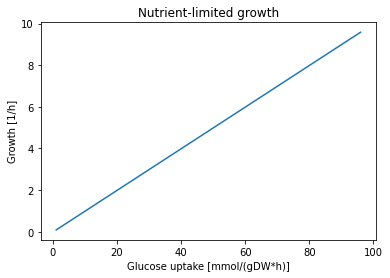

In [7]:
plot_growth(simul,'Nutrient-limited growth')

### Exercices

Replicate the previous experiment using the metabolic model with enzymatic constraints: `"data/iJO1366_sMOMENT_2019_06_25.xml"`.


In [8]:
model = read_sbml_model('data/iJO1366_sMOMENT_2019_06_25.xml')
model.reactions.get_by_id('EX_glc__D_e').bounds = (-10000, 10000)
simul = get_simulator(model,envcond=envcond)

In [9]:
simul.find(simul.get_uptake_reactions())

,id,name,lb,ub,stoichiometry,gpr
0,EX_ca2_e,Calcium exchange,-10000,10000,{'ca2_e': -1.0},
1,EX_cbl1_e,Cob(I)alamin exchange,-10000,10000,{'cbl1_e': -1.0},
2,EX_cl_e,Chloride exchange,-10000,10000,{'cl_e': -1.0},
3,EX_co2_e,CO2 exchange,-10000,10000,{'co2_e': -1.0},
4,EX_cobalt2_e,Co2+ exchange,-10000,10000,{'cobalt2_e': -1.0},
5,EX_cu2_e,Cu2+ exchange,-10000,10000,{'cu2_e': -1.0},
6,EX_fe2_e,Fe2+ exchange,-10000,10000,{'fe2_e': -1.0},
7,EX_fe3_e,Fe3+ exchange,-10000,10000,{'fe3_e': -1.0},
8,EX_glc__D_e,D-Glucose exchange,-10000,10000,{'glc__D_e': -1.0},
9,EX_h_e,H+ exchange,-10000,10000,{'h_e': -1.0},


In [10]:
simul.find()

,id,name,lb,ub,stoichiometry,gpr
0,DM_4crsol_c,Sink needed to allow p-Cresol to leave system,0.0,1000.0000,{'4crsol_c': -1.0},
1,DM_5drib_c,Sink needed to allow 5'-deoxyribose to leave s...,0.0,1000.0000,{'5drib_c': -1.0},
2,DM_aacald_c,Sink needed to allow aminoacetaldehyde to leav...,0.0,1000.0000,{'aacald_c': -1.0},
3,DM_amob_c,Sink needed to allow S-Adenosyl-4-methylthio-2...,0.0,1000.0000,{'amob_c': -1.0},
4,DM_mththf_c,"Sink needed to allow (2R,4S)-2-methyl-2,3,3,4-...",0.0,1000.0000,{'mththf_c': -1.0},
...,...,...,...,...,...,...
3173,XYLtex_TG_forward,D-xylose transport via diffusion (extracellula...,0.0,1000.0000,"{'xyl__D_e': -1.0, 'prot_pool': -2.31055471762...",b1377 or b0241 or b0929 or b2215
3174,XYLtex_TG_reverse,D-xylose transport via diffusion (extracellula...,0.0,1000.0000,"{'xyl__D_p': -1.0, 'prot_pool': -2.31055471762...",b1377 or b0241 or b0929 or b2215
3175,Zn2tex_TG_forward,Zinc (Zn+2) transport via diffusion (extracell...,0.0,1000.0000,"{'zn2_e': -1.0, 'prot_pool': -2.31055471762559...",b1377 or b0241 or b0929 or b2215
3176,Zn2tex_TG_reverse,Zinc (Zn+2) transport via diffusion (extracell...,0.0,1000.0000,"{'zn2_p': -1.0, 'prot_pool': -2.31055471762559...",b1377 or b0241 or b0929 or b2215


### Ex 1
Note that the stoichiometry of some reactions include the usage of a _prot_pool_ pseudo-substrate

Complete the exercice:

* define the simulation objective;
* use the `plot_growth` function to plot the cellular growth. You may define as title 'Nutrient and Proteome-limited growth'

In [11]:
# define the simulation objective
simul.objective = BIOMASS

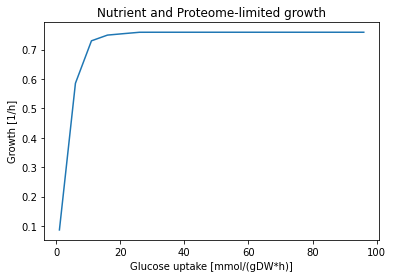

In [12]:
# plot
plot_growth(simul,'Nutrient and Proteome-limited growth')

### Ex 2

Identify the minimum glucose uptake that allows to reach maximal growth:
* identify the maximum biomass value
* run an FBA simulation setting as objective the "minimization" of glucose uptake, constrained by a maximum biomass rate. Note that uptakes rate are negative. You might want to look at the `simulate` method documentation, `help(simul.simulate)` 

In [14]:
# compute the maximal growth
res = simul.simulate()
growth = res.objective_value
growth

0.7586643769762126

In [15]:
# compute the minimal glucose uptake rate that enables maximal growth
simul.simulate(objective={GLC:1},constraints={BIOMASS:(growth,growth)})

objective: -26.22220086296752
Status: OPTIMAL
Constraints: OrderedDict([('EX_co2_e', (-10000, 10000)), ('EX_cobalt2_e', (-10000, 10000)), ('EX_h_e', (-10000, 10000)), ('EX_h2o_e', (-10000, 10000)), ('EX_k_e', (-10000, 10000)), ('EX_cu2_e', (-10000, 10000)), ('EX_mg2_e', (-10000, 10000)), ('EX_mn2_e', (-10000, 10000)), ('EX_mobd_e', (-10000, 10000)), ('EX_na1_e', (-10000, 10000)), ('EX_nh4_e', (-10000, 10000)), ('EX_ca2_e', (-10000, 10000)), ('EX_cbl1_e', (-10000, 10000)), ('EX_ni2_e', (-10000, 10000)), ('EX_o2_e', (-10000, 10000)), ('EX_cl_e', (-10000, 10000)), ('EX_pi_e', (-10000, 10000)), ('EX_zn2_e', (-10000, 10000)), ('EX_sel_e', (-10000, 10000)), ('EX_slnt_e', (-10000, 10000)), ('EX_so4_e', (-10000, 10000)), ('EX_tungs_e', (-10000, 10000)), ('EX_fe2_e', (-10000, 10000)), ('EX_fe3_e', (-10000, 10000)), ('BIOMASS_Ec_iJO1366_WT_53p95M', (0.7586643769762126, 10000))])
Method:SimulationMethod.FBA

In [16]:
help(simul.FVA)

Help on method FVA in module mewpy.simulation.cobra:

FVA(reactions=None, obj_frac=0.9, constraints=None, loopless=False, internal=None, solver=None, format='dict') method of mewpy.simulation.cobra.Simulation instance
    Flux Variability Analysis (FVA).
    
    :param model: An instance of a constraint-based model.
    :param float obj_frac: The minimum fraction of the maximum growth rate (default 0.9). Requires that the             objective value is at least the fraction times maximum objective value. A value of 0.85 for instance             means that the objective has to be at least at 85% percent of its maximum.
    :param list reactions: List of reactions to analyze (default: all).
    :param dic constraints: Additional constraints (optional).
    :param boolean loopless: Run looplessFBA internally (very slow) (default: false).
    :param list internal: List of internal reactions for looplessFBA (optional).
    :param solver: A pre-instantiated solver instance (optional).
    :